<a href="https://colab.research.google.com/github/shivanialane/ML-Project/blob/main/TrainML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder            #...>non numerical to numerical labels conversion
from sklearn.model_selection import train_test_split      #...>splits data into two random subsets:training and testing
from sklearn.preprocessing import MinMaxScaler            #...>used to scale data features to a specific range, btw 0 and 1
from sklearn.preprocessing import StandardScaler          #...>standardize data features to a mean of 0 and standard  deviation of 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report         #to evaluate the performance of a classification model based on precision,recall,F1 score ,and support

# Load Data

In [ ]:
df = pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/train.csv')
df.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
test.describe()

,X,Y
count,144576.000000,144575.000000
mean,-122.422908,37.768313
std,0.025571,0.023791
min,-122.513642,37.707922
25%,-122.433625,37.755344
50%,-122.416452,37.775421
75%,-122.406568,37.784935
max,-122.365241,37.819975


# Remove Null Values

In [ ]:
for col in df.columns:
    mode_val = df[col].mode()                              #fillna is used to fill the missing values 
    df[col].fillna(value=mode_val, inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

for col in test.columns:
    mode_val = test[col].mode()
    test[col].fillna(value=mode_val, inplace=True)
test.fillna(method='ffill', inplace=True)                  #ffill:forward fill (previous rows)
test.fillna(method='bfill', inplace=True)                  #bfill:bakward fill (next rows)

# Visualization

<ipython-input-89-cc9a406ce436>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Category', data=df, palette='Paired', ax=ax, color = 'red')


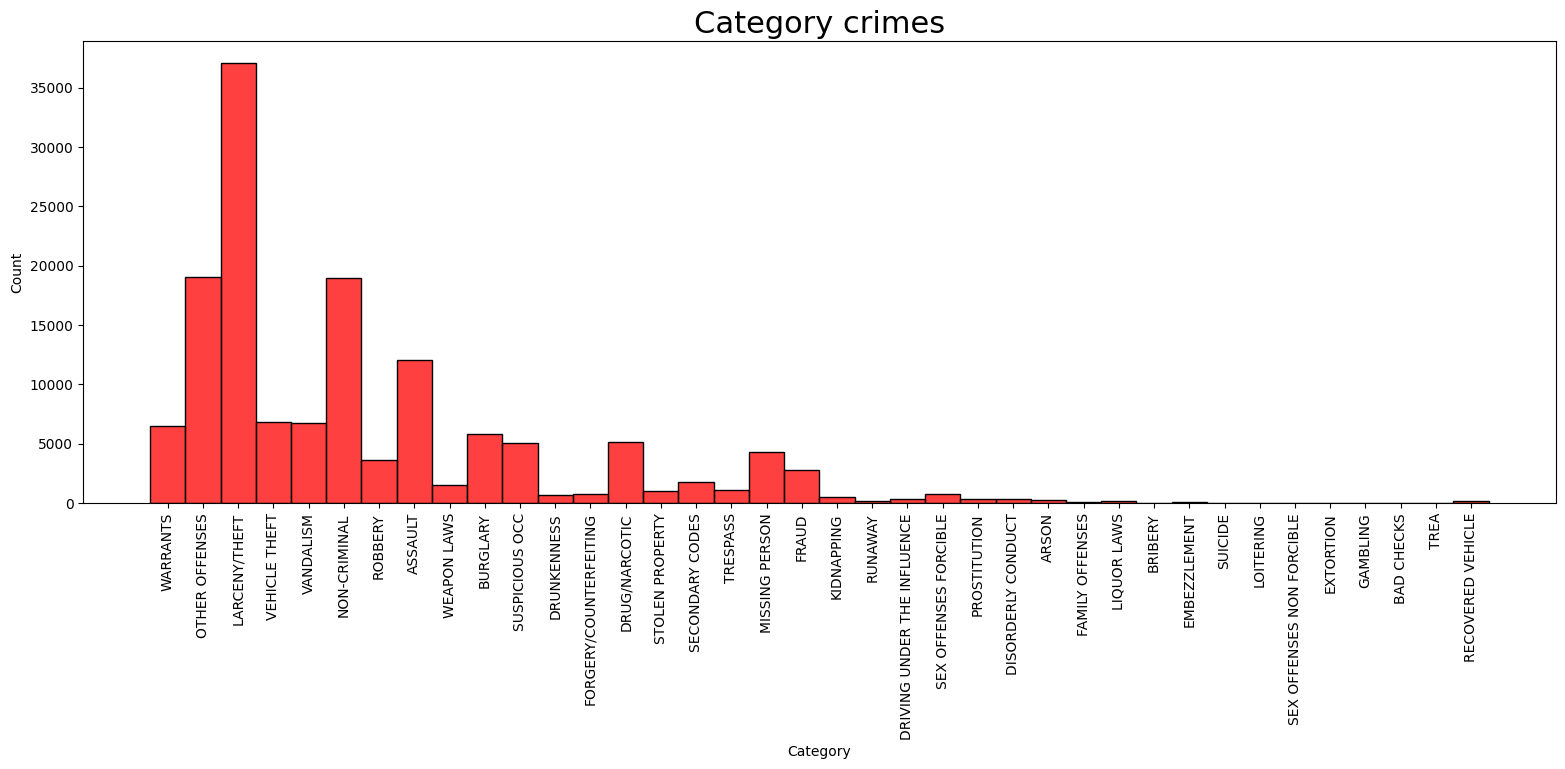

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Category', data=df, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Category crimes", fontsize=22)
plt.show()

<ipython-input-90-67864a4872cd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='PdDistrict', data=df, palette='Paired', ax=ax, color = 'red')


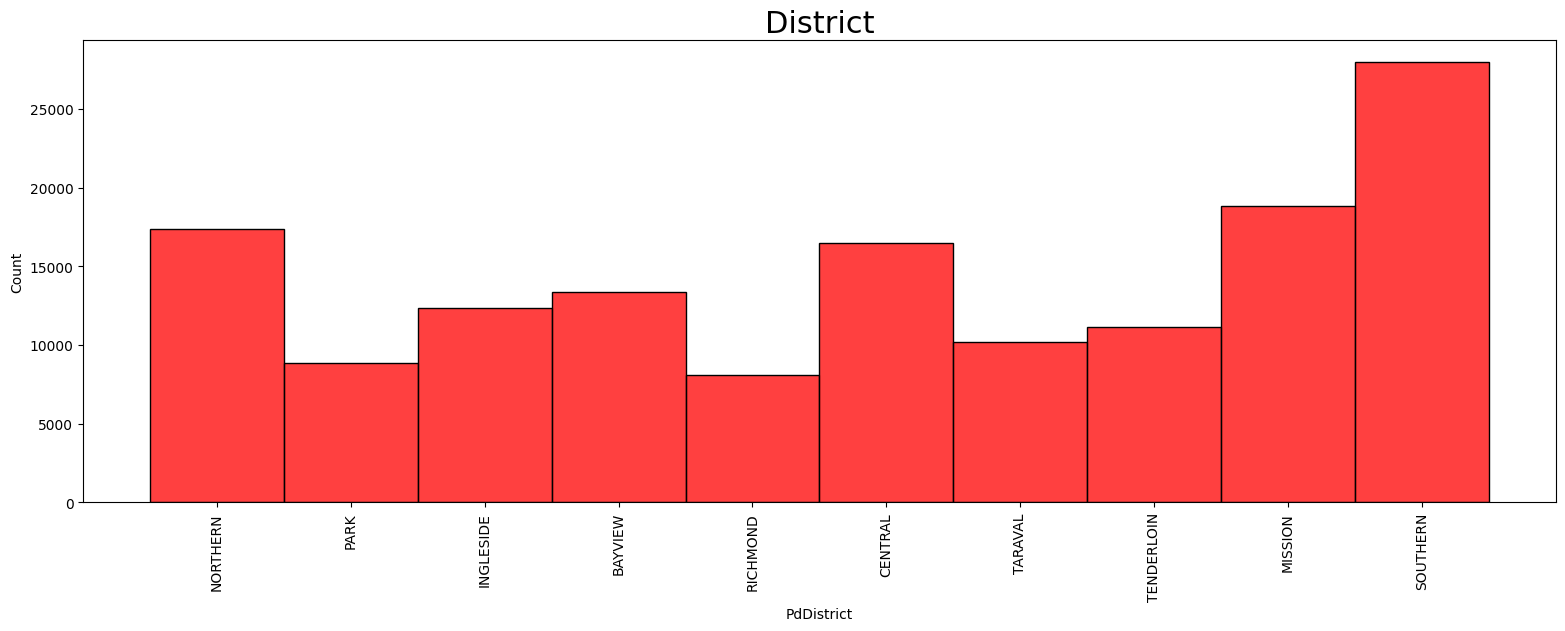

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='PdDistrict', data=df, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("District", fontsize=22)
plt.show()

<ipython-input-91-5da3ac608507>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Resolution', data=df, palette='Paired', ax=ax, color = 'red')


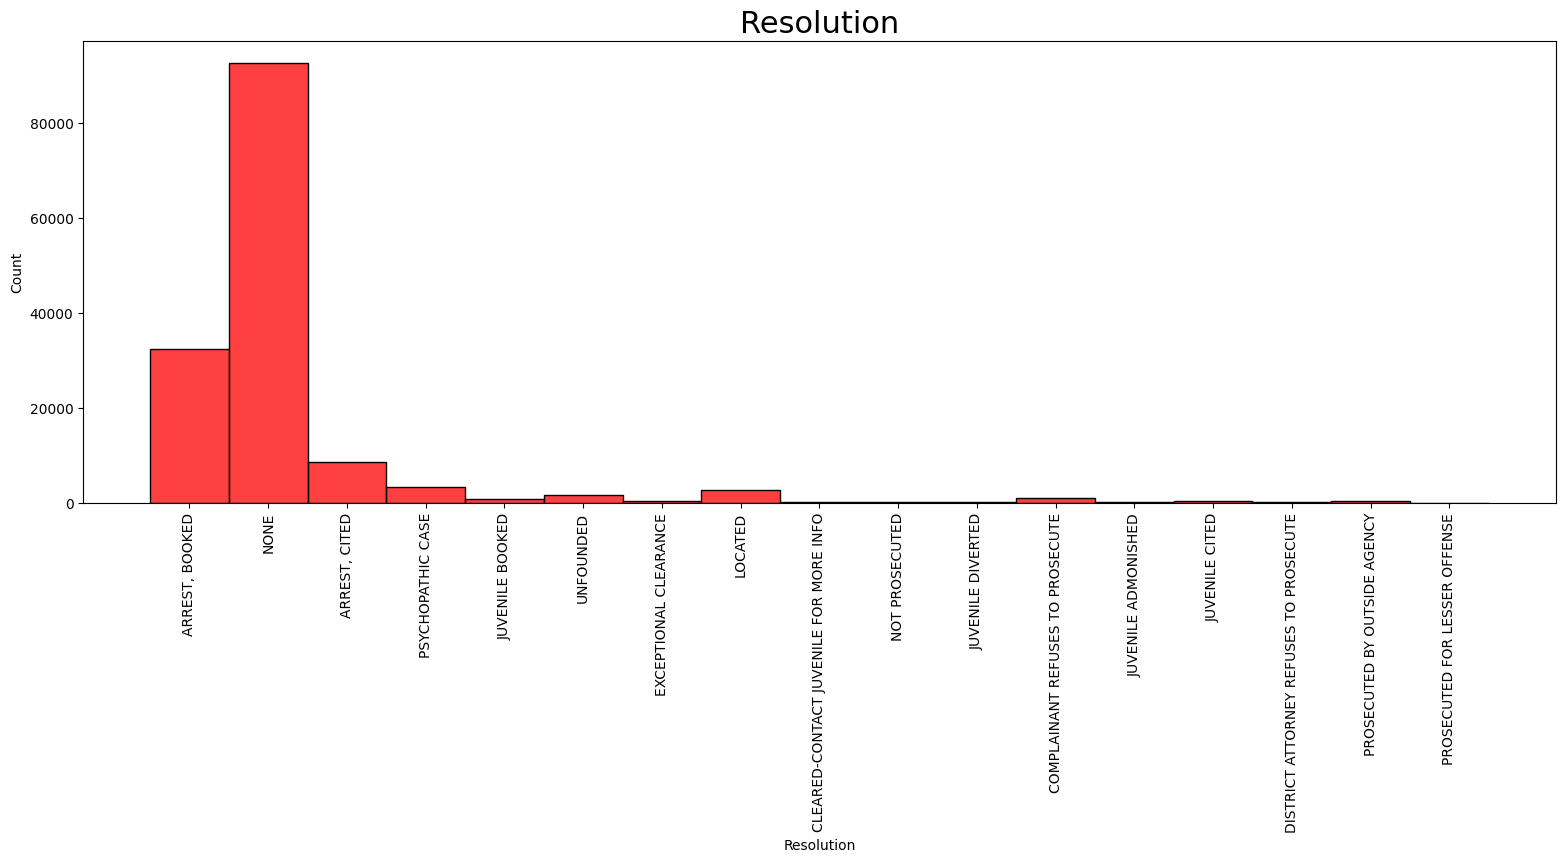

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Resolution', data=df, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Resolution", fontsize=22)
plt.show()

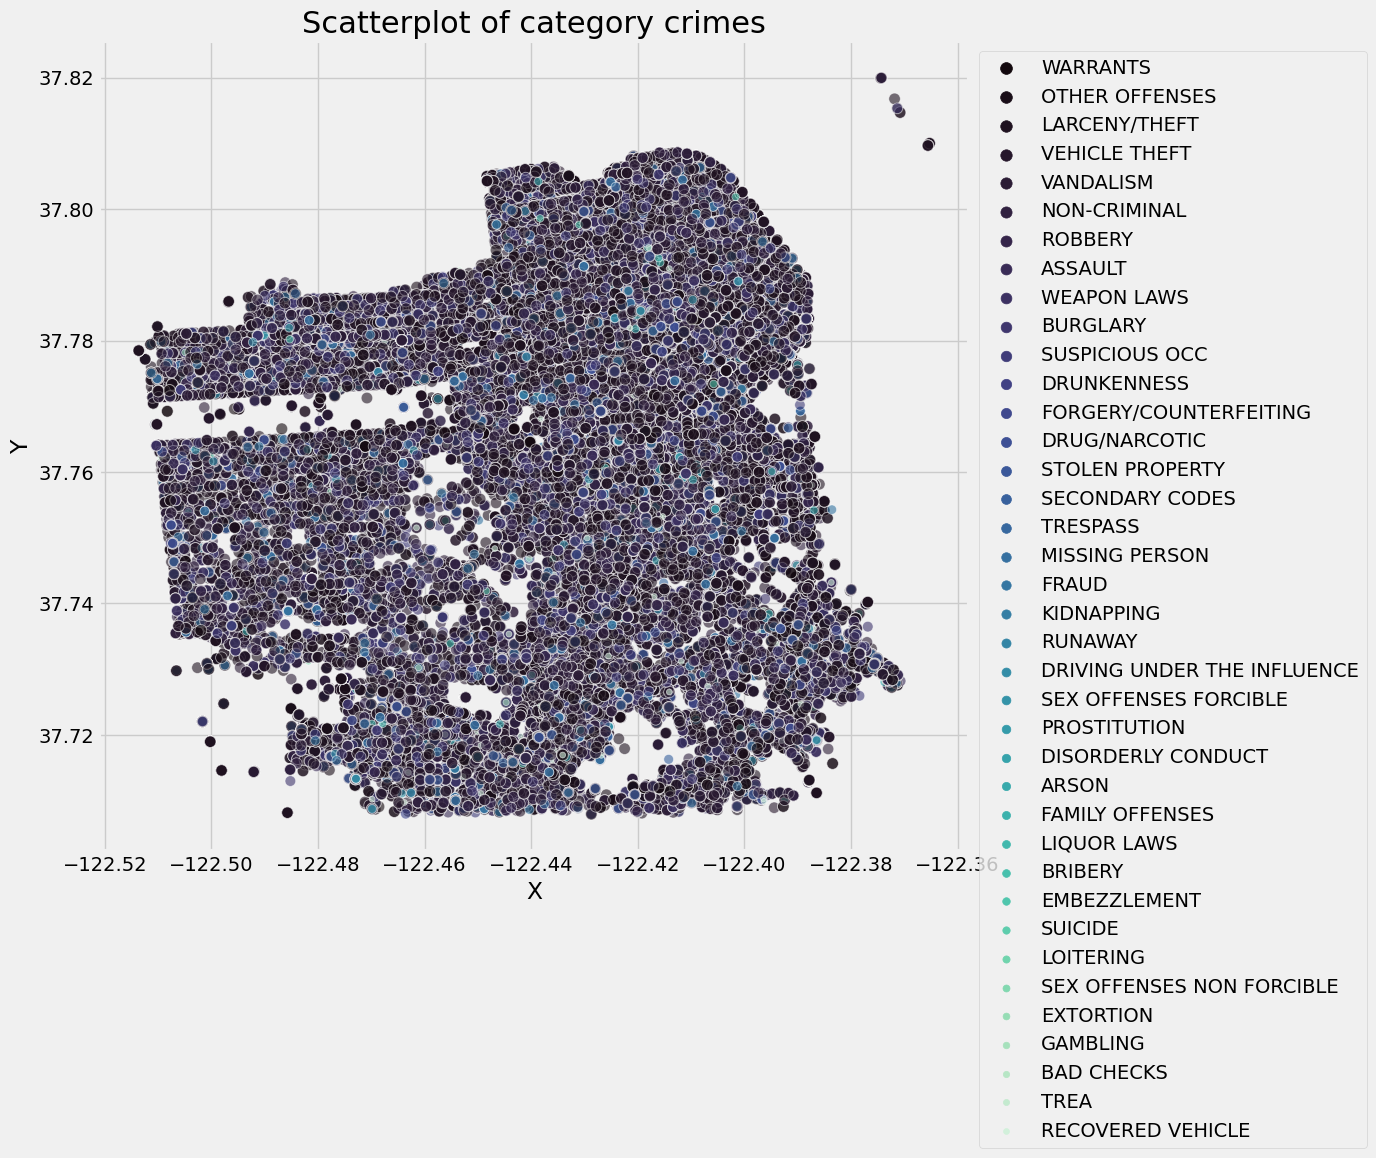

In [ ]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    sns.scatterplot(data=df.iloc[:250000], x='X', y='Y', alpha=0.6, palette='mako', hue='Category', size='Category')
    plt.title("Scatterplot of category crimes", fontsize=22) 
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# EDA 

---



In [ ]:
df.shape

(144576, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144576 entries, 0 to 144575
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       144576 non-null  object 
 1   Category    144576 non-null  object 
 2   Descript    144576 non-null  object 
 3   DayOfWeek   144576 non-null  object 
 4   PdDistrict  144576 non-null  object 
 5   Resolution  144576 non-null  object 
 6   Address     144576 non-null  object 
 7   X           144576 non-null  float64
 8   Y           144576 non-null  float64
dtypes: float64(2), object(7)
memory usage: 9.9+ MB


In [ ]:
df.duplicated().sum()

389

In [ ]:
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [ ]:
df.nunique()

Dates         62977
Category         38
Descript        733
DayOfWeek         7
PdDistrict       10
Resolution       17
Address       15859
X             19511
Y             19510
dtype: int64

In [ ]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'])

df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day_of_month'] = df['Dates'].dt.day
df['day_of_week'] = df['Dates'].dt.day_of_week
df['hour'] = df['Dates'].dt.hour
df.drop(['Dates', 'DayOfWeek'], axis = 1, inplace = True)
df.dtypes

Category         object
Descript         object
PdDistrict       object
Resolution       object
Address          object
X               float64
Y               float64
year              int64
month             int64
day_of_month      int64
day_of_week       int64
hour              int64
dtype: object

In [ ]:
df.columns = [item.lower() for item in df.columns]            #changing the column names to lower case
df.head()

,category,descript,pddistrict,resolution,address,x,y,year,month,day_of_month,day_of_week,hour
0,WARRANTS,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23


In [ ]:
pd.crosstab(df['day_of_week'], df['category'])            #compare the results of variables       

category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,46,1566,5,9,845,45,40,797,85,34,...,1,142,10,693,1,159,951,957,897,212
1,34,1540,3,3,855,35,40,762,84,18,...,6,152,6,778,1,160,903,947,943,180
2,35,1700,3,11,887,60,39,852,95,17,...,2,150,6,788,0,135,929,978,1048,204
3,22,1602,3,6,791,48,40,802,84,24,...,5,156,12,725,0,159,855,875,950,208
4,45,1752,6,10,987,47,59,697,94,22,...,3,164,5,796,0,164,1017,1068,968,226
5,40,1902,0,10,770,44,87,626,117,11,...,2,143,6,659,1,162,1102,1048,862,227
6,27,2006,0,8,718,59,65,648,136,17,...,3,133,5,667,0,152,1030,950,829,237


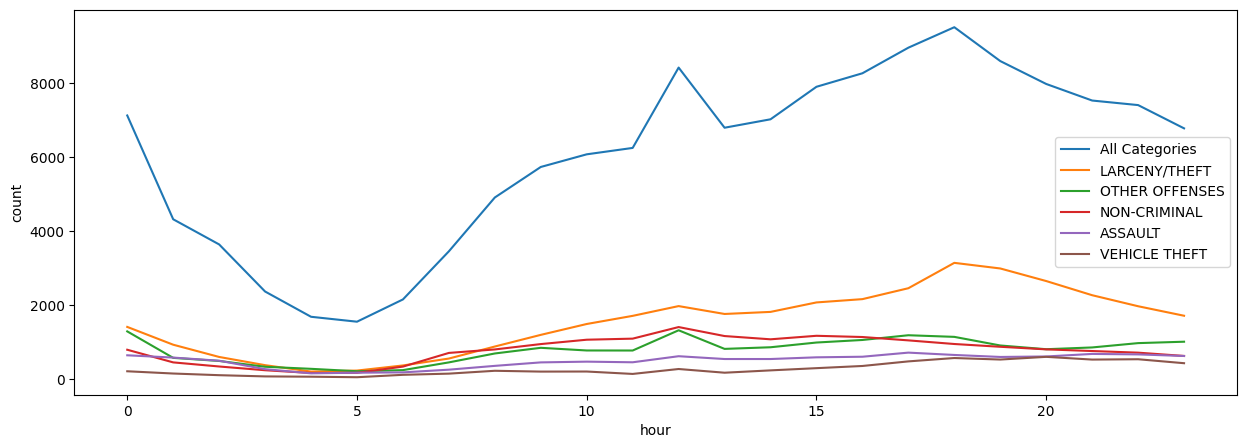

In [ ]:
category_count = df.category.value_counts().to_frame().reset_index()
top5category = category_count.iloc[:5] 

df_cat = df.hour.value_counts().to_frame().sort_index()
plt.figure(figsize = (15, 5))
plt.plot(df_cat)

for item in top5category['index']:
    df_cat = df[df.category == item].hour.value_counts().to_frame().sort_index()
    plt.plot(df_cat)
plt.legend(['All Categories'] + list(top5category['index'].values))
plt.xlabel('hour')
_ = plt.ylabel('count')

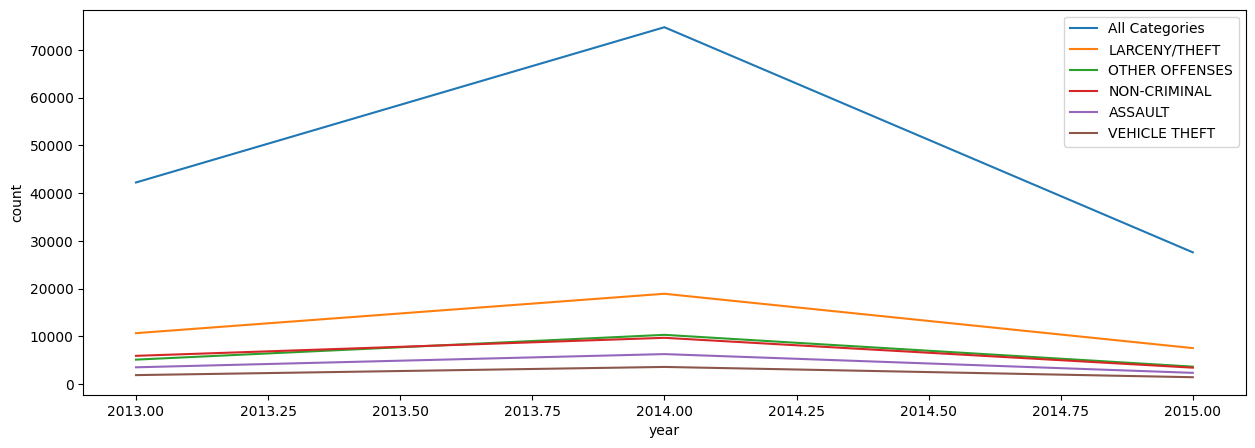

In [ ]:
category_count = df.category.value_counts().to_frame().reset_index()
top5category = category_count.iloc[:5] 

df_cat = df.year.value_counts().to_frame().sort_index()
plt.figure(figsize = (15, 5))
plt.plot(df_cat)

for item in top5category['index']:
    df_cat = df[df.category == item].year.value_counts().to_frame().sort_index()
    plt.plot(df_cat)
plt.legend(['All Categories'] + list(top5category['index'].values))
plt.xlabel('year')
_ = plt.ylabel('count')

<Axes: xlabel='pddistrict', ylabel='category'>

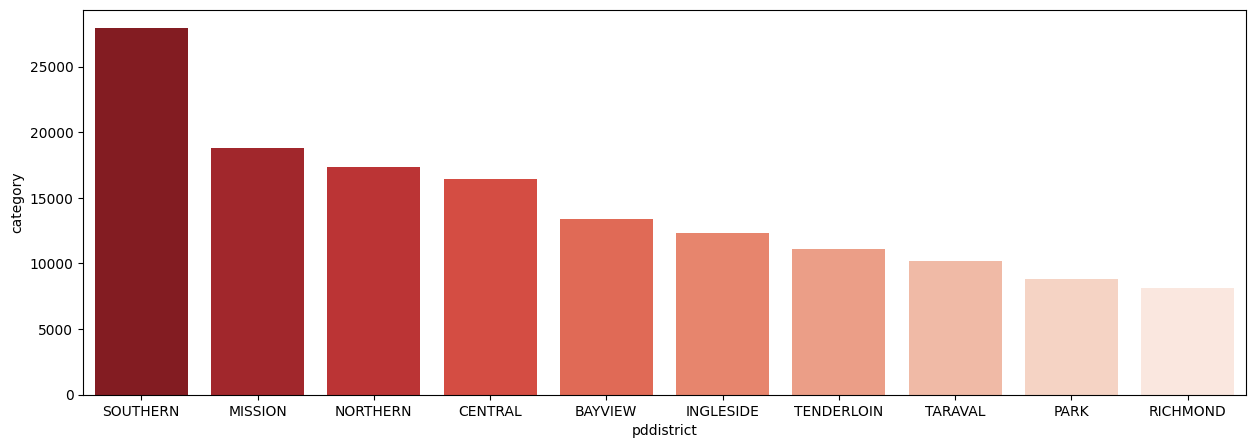

In [ ]:
df1 = df.groupby('pddistrict').count().reset_index()[['pddistrict', 'category']].sort_values('category', ascending = False)
plt.figure(figsize = (15, 5))
sns.barplot(x = 'pddistrict',y = 'category',data = df1, palette= 'Reds_r')

# Data preprocessing

Variable Encoding

In [ ]:
top200Des = df['descript'].value_counts()[:200].index
df['descript'] = df['descript'].apply(lambda x :x if x in top200Des else 'other' )
x = df.drop(['category', 'address'], axis = 1)
y = df['category']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
x['descript'] = le.fit_transform(x['descript'])
x['pddistrict'] = le.fit_transform(x['pddistrict'])
x['resolution'] = le.fit_transform(x['resolution'])


split data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)
print('x train :', x_train.shape,'\t\tx test :', x_test.shape)
print('y train :', y_train.shape,'\t\ty test :', y_test.shape)

x train : (122889, 10) 		x test : (21687, 10)
y train : (122889,) 		y test : (21687,)


# feature scaling

In [ ]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train your model

# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)



In [ ]:
accuracy_score(y_pred, y_test)

0.4417392908193849

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[  1,  16,   0, ...,   3,   2,   0],
       [  6, 884,   0, ...,  71,  53,   6],
       [  0,   2,   0, ...,   0,   0,   0],
       ...,
       [  1,  86,   0, ..., 577,   5,   0],
       [  3,  89,   0, ...,  10, 223,   4],
       [  0,  25,   0, ...,   4,  13,   3]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.03      0.02      0.03        42
           1       0.36      0.49      0.41      1817
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.34      0.32      0.33       888
           5       0.04      0.02      0.03        45
           6       0.04      0.02      0.03        55
           7       0.38      0.57      0.46       767
           8       0.16      0.14      0.15       100
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        11
          12       0.03      0.01      0.01       110
          13       0.15      0.09      0.11       392
          15       0.11      0.04      0.06        78
          16       0.58      0.82      0.68      5565
          17       0.20      0.07      0.11        27
          18       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)


0.9056116567528935

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[  16,   12,    0, ...,    0,    0,    0],
       [   1, 1632,    0, ...,    2,    2,    5],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    5,    0, ..., 1002,    0,    0],
       [   0,    7,    0, ...,    1,  858,    2],
       [   2,    3,    0, ...,    0,    4,  116]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.76      0.38      0.51        42
           1       0.89      0.90      0.89      1817
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.94      0.93      0.94       888
           5       0.45      0.22      0.30        45
           6       0.88      0.65      0.75        55
           7       0.86      0.90      0.88       767
           8       0.74      0.48      0.58       100
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00         6
          11       0.40      0.18      0.25        11
          12       0.65      0.30      0.41       110
          13       0.87      0.76      0.81       392
          15       0.52      0.21      0.29        78
          16       0.98      0.98      0.98      5565
          17       0.67      0.15      0.24        27
          18       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state= 1)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9577627149905473

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[  30,    2,    0, ...,    0,    0,    1],
       [   0, 1749,    0, ...,    1,    0,    6],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ..., 1033,    0,    1],
       [   0,    2,    0, ...,    0,  899,    0],
       [   1,    4,    0, ...,    1,    1,  170]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        42
           1       0.95      0.96      0.96      1817
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.93      0.92      0.93       888
           5       0.71      0.78      0.74        45
           6       0.81      0.84      0.82        55
           7       0.92      0.92      0.92       767
           8       1.00      1.00      1.00       100
           9       0.03      0.08      0.05        13
          10       0.00      0.00      0.00         6
          11       0.22      0.18      0.20        11
          12       0.78      0.76      0.77       110
          13       0.90      0.87      0.88       392
          15       0.69      0.67      0.68        78
          16       0.99      0.99      0.99      5565
          17       0.58      0.52      0.55        27
          18       0.00    

# XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9615898925623646

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[  30,    2,    0, ...,    0,    0,    0],
       [   0, 1743,    0, ...,    0,    0,    8],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    2,    0, ..., 1033,    0,    0],
       [   0,    3,    0, ...,    0,  900,    0],
       [   1,    3,    0, ...,    0,    0,  171]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        42
           1       0.97      0.96      0.97      1817
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.92      0.94      0.93       888
           5       0.83      0.78      0.80        45
           6       0.92      0.84      0.88        55
           7       0.92      0.92      0.92       767
           8       1.00      1.00      1.00       100
           9       0.08      0.08      0.08        13
          10       0.00      0.00      0.00         6
          11       0.67      0.18      0.29        11
          12       0.91      0.75      0.83       110
          13       0.93      0.87      0.90       392
          15       0.80      0.77      0.78        78
          16       0.99      0.99      0.99      5565
          17       0.93      0.52      0.67        27
          18       0.33    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x

,descript,pddistrict,resolution,x,y,year,month,day_of_month,day_of_week,hour
0,199,4,0,-122.425892,37.774599,2015,5,13,2,23
1,190,4,0,-122.425892,37.774599,2015,5,13,2,23
2,190,4,0,-122.424363,37.800414,2015,5,13,2,23
3,91,4,11,-122.426995,37.800873,2015,5,13,2,23
4,91,5,11,-122.438738,37.771541,2015,5,13,2,23
...,...,...,...,...,...,...,...,...,...,...
144571,200,4,11,-122.425565,37.781270,2013,6,14,4,0
144572,77,8,11,-122.498323,37.742970,2013,6,14,4,0
144573,62,0,1,-122.372014,37.729879,2013,6,14,4,0
144574,190,3,11,-122.414845,37.760500,2013,6,13,3,23
